This workshop we will be using NLTK library to walk you through some basic steps of a text analysis project. NLTK is one of the most popular tools to process human language data. 

Some basic steps of text analysis we are going to demonstrate include:

       -tokenize text
       -clean punctuations 
       -remove stop words 
       -stemm words 
       -tag words 
       -vocabulary diversity
       -word frequency distribution
       -sentiment analysis

In [1]:
from pathlib import Path
import pandas as pd
import os
import glob
import sys

### Import files

In order to import a folder of files, we use the os.chdir function to first navigate to the right directory.

Then we use glob.glob function to iterate through all files.

In [3]:
print (os.getcwd()) #getcwd helps check if we are at the right directory

my_dir ="Sample_data"
os.chdir(my_dir)   #change the current working directory to specified path. 

reviewList=[]
for files in glob.glob("*.txt"):   #glob.glob returns a list of pathnames. It helps us loop through all files
    df = pd.read_csv(files)
    for content in df:
#         print (content) #read reviews as strings
        reviewList.append(content)
print (reviewList)

/Users/Xmi/Desktop/Text_Analysis
["My boyfriend and I went to watch The Guardian.At first I didn't want to watch it", ' but I loved the movie- It was definitely the best movie I have seen in sometime.They portrayed the USCG very well', ' it really showed me what they do and I think they should really be appreciated more.Not only did it teach but it was a really good movie. The movie shows what the really do and how hard the job is.I think being a USCG would be challenging and very scary. It was a great movie all around. I would suggest this movie for anyone to see.The ending broke my heart but I know why he did it. The storyline was great I give it 2 thumbs up. I cried it was very emotional', ' I would give it a 20 if I could!', "David Bryce's comments nearby are exceptionally well written and informative as almost say everything I feel about DARLING LILI. This massive musical is so peculiar and over blown", ' over produced and must have caused ruptures at Paramount in 1970. It cost 22

Convert the review list into a huge string.

In [22]:
str1= " "
data = str1.join(reviewList)
data = data.replace("<br />","")
# print (data)

# tokens = nltk.word_tokenize(str(words)) #convert words from list to string and tokenize them
# print (tokens)

### Remove punctuation and stop words
Tokenization is the process by which big quantity of text is divided into smaller parts called tokens.

http://www.nltk.org/nltk_data/

In [23]:
import nltk
# nltk.download_shell()

In [24]:
# import re, pprint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [26]:
punctuations = "$?:!.,;/\\&*)--(...-``''"

# tokens = word_tokenize(data)
tokens = word_tokenize(data.replace("."," "))
words =[word.lower() for word in tokens if not word in punctuations]
print (sorted(words))



["'conflict", "'d", "'ll", "'ll", "'ll", "'ll", "'ll", "'ll", "'m", "'m", "'m", "'m", "'officer", "'re", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'s", "'ve", "'ve", "'ve", "'ve", '1/2', '10', '10', '10', '100th', '12', '15', '1940s', '1970', '1982', '1million', '1st', '1st', '2', '2', '2/3', '20', '20', '2003', '22', '22', '24', '25', '4', '4', '40s', '5', '5m', '6', '6', '60s', '7', '70mm', '77', '77', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a'

In [28]:
stop_words = set(stopwords.words('english'))

## Add extra stop words after viewing the results
stop_words.add("m")
stop_words.add("'s")
# stop_words.remove("yourself")
# print (sorted(stop_words))

filtered_words = [word for word in words if not word in stop_words]
print (sorted(filtered_words)[:10])


["'conflict", "'d", "'ll", "'ll", "'ll", "'ll", "'ll", "'ll", "'m", "'m"]


### Stemming and Lemmatization

To reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [29]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
stemmer2 =SnowballStemmer("english")

stem_words = [stemmer2.stem(words) for words in filtered_words]
print (stem_words)

['boyfriend', 'went', 'watch', 'guardian', 'first', "n't", 'want', 'watch', 'love', 'movie-', 'definit', 'best', 'movi', 'seen', 'sometim', 'portray', 'uscg', 'well', 'realli', 'show', 'think', 'realli', 'appreci', 'teach', 'realli', 'good', 'movi', 'movi', 'show', 'realli', 'hard', 'job', 'think', 'uscg', 'would', 'challeng', 'scari', 'great', 'movi', 'around', 'would', 'suggest', 'movi', 'anyon', 'see', 'end', 'broke', 'heart', 'know', 'storylin', 'great', 'give', '2', 'thumb', 'cri', 'emot', 'would', 'give', '20', 'could', 'david', 'bryce', 'comment', 'nearbi', 'except', 'well', 'written', 'inform', 'almost', 'say', 'everyth', 'feel', 'darl', 'lili', 'massiv', 'music', 'peculiar', 'blown', 'produc', 'must', 'caus', 'ruptur', 'paramount', '1970', 'cost', '22', 'million', 'dollar', 'simpli', 'irrespons', 'darl', 'lili', 'must', 'greenlit', 'board', 'meet', 'said', 'hey', 'got', 'pink', 'panther', 'guy', 'sound', 'music', 'gal', 'let', 'get', 'hand', 'blank', 'chequ', 'result', 'hybrid

In [30]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
print (wnl.lemmatize("cats"))
print (wnl.lemmatize("giggling"))
print (wnl.lemmatize("giggling", "v"))

# lemm_words = [wnl.lemmatize(word) for word in filtered_words]
# print (sorted(lemm_words))


cat
giggling
giggle


### Speech Tagging

    CC   coordinating conjunction
    CD   cardinal digit
    DT   determiner
    EX   existential there (like: "there is" ... think of it like "there exists")
    FW   foreign word
    IN   preposition/subordinating conjunction
    JJ   adjective 'big'
    JJR   adjective, comparative 'bigger'
    JJS   adjective, superlative 'biggest'
    LS   list marker 1)
    MD   modal could, will
    NN   noun, singular 'desk'
    NNS   noun plural 'desks'
    NNP   proper noun, singular 'Harrison'
    NNPS   proper noun, plural 'Americans'
    PDT   predeterminer 'all the kids'
    POS   possessive ending parent's
    PRP   personal pronoun I, he, she
    PRP$   possessive pronoun my, his, hers
    
    RB   adverb very, silently
    RBR   adverb, comparative better
    UH   interjection errrrrrrrm
    VB   verb, base form take
    VBD   verb, past tense took
    VBG   verb, gerund/present participle taking
    VBN   verb, past participle taken
    VBP   verb, sing. present, non-3d take
    VBZ   verb, 3rd person sing. present takes
    WDT   wh-determiner which
    WP   wh-pronoun who, what
    WP$   possessive wh-pronoun whose
    WRB   wh-abverb where, when
    RBS   adverb, superlative best
    RP   particle give up
    TO   to go 'to' the store


#### 1. Use tags for lemmatization

pos_tag gets the tag for the word, it comes in form of a list of tuples[(word1, tag1)(word2, tag2)(word3, tag3)].

Use indexing to drill down: the first[0] gets to the individual tuples, the [1] gets to the tags, and the [0] grabs the first letter of a tag.

In [31]:
from nltk.corpus import wordnet  

#WordNet is a large lexical database of English. Nouns, verbs, adjectives and adverbs 
#are grouped into sets of cognitive synonyms (synsets), each expressing a distinct concept. 

print (nltk.pos_tag(["meaningful"])[0][1][0])
       
       
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# print (get_wordnet_pos("facing"))
# print (get_wordnet_pos("kindly"))


lemm_words = [wnl.lemmatize(w, get_wordnet_pos(w)) for w in filtered_words]
print (sorted(lemm_words)[220:400])

N
['binge', 'bit', 'bit', 'blake', 'blake', 'blank', 'bleating', 'blown', 'blustery', 'board', 'boat', 'boater', 'bodyguard', 'boring', 'boring', 'boring', 'borrow', 'borrowing', 'borrows', 'bos', 'bout', 'boy', 'boyfriend', 'branch', 'bravery', 'breathtaking', 'brilliant-but-unreliable', 'british', 'broke', 'brought', 'bryce', 'build', 'butt', 'butter', 'butterfly', 'buy', 'buy', 'ca', 'ca', 'calm', 'capable', 'captain', 'captain', 'cardboard', 'care', 'care', 'care', 'care', 'care', 'career', 'careful', 'carry', 'carry', 'case', 'case', 'cast', 'catch', 'caught', 'cause', 'cease', 'celebrity', 'center', 'center', 'center', 'center', 'certainly', 'cg', 'challenge', 'chance', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'character', 'check', 'cheesy', 'chemistry

#### 2. Tagging our data

nltk.pos_tag() returns a tuple with the POS tag. The key here is to map NLTK’s POS tags to the format wordnet lemmatizer would accept. The get_wordnet_pos() function defined below does this mapping job.

Reference: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [32]:
text = word_tokenize("faking a review for tagging purpose")
nltk.pos_tag(text)

[('faking', 'VBG'),
 ('a', 'DT'),
 ('review', 'NN'),
 ('for', 'IN'),
 ('tagging', 'VBG'),
 ('purpose', 'NN')]

In [33]:
from collections import Counter

tags = nltk.pos_tag(lemm_words)
# print (tags[:5])

tag_counts = Counter(tag for word,tag in tags)
print (tag_counts)


Counter({'NN': 978, 'JJ': 422, 'RB': 235, 'VBP': 129, 'VB': 119, 'CD': 71, 'IN': 51, 'VBD': 48, 'MD': 40, 'NNS': 23, 'VBG': 19, 'VBN': 16, 'VBZ': 14, 'JJR': 13, 'JJS': 7, 'DT': 6, 'RBR': 6, 'FW': 4, 'NNP': 2, 'RP': 2, 'UH': 2, 'POS': 2, 'CC': 1, 'WP$': 1, 'WDT': 1})


### Counting Words

#### 1. Check Vocabulary Diversity
set() creates a distinct collection of the iterable elements (all words here).

In [34]:
print (len(set(lemm_words)))  # number of distinct words
print (len(lemm_words))    # number of total words
print ("The vocabulary diversity of the reviews is: "+ str(len(set(lemm_words))/len(lemm_words)))

1083
2212
The vocabulary diversity of the reviews is: 0.4896021699819168


#### 2. Count total words and unique words

In [35]:
# create a dictionary to store uniques words and their counts.
count = {}
for w in lemm_words:
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
    
# count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}
print (count)

# "key=lambda" allows us to sort our dictionary by value. 
# This is an example of a Lambda function, which is a function without a name.
# default it's ascending sort, "reverse=True" flips the order to descending.


{'boyfriend': 1, 'go': 16, 'watch': 6, 'guardian': 3, 'first': 6, "n't": 29, 'want': 5, 'love': 8, 'movie-': 1, 'definitely': 5, 'best': 7, 'movie': 69, 'see': 24, 'sometime': 1, 'portrayed': 1, 'uscg': 5, 'well': 15, 'really': 11, 'show': 5, 'think': 9, 'appreciate': 2, 'teach': 2, 'good': 8, 'hard': 2, 'job': 3, 'would': 11, 'challenge': 1, 'scary': 1, 'great': 9, 'around': 5, 'suggest': 2, 'anyone': 3, 'end': 6, 'broke': 1, 'heart': 1, 'know': 7, 'storyline': 1, 'give': 10, '2': 2, 'thumb': 1, 'cry': 2, 'emotional': 1, '20': 2, 'could': 11, 'david': 1, 'bryce': 1, 'comment': 1, 'nearby': 1, 'exceptionally': 1, 'write': 2, 'informative': 1, 'almost': 3, 'say': 7, 'everything': 1, 'feel': 4, 'darling': 5, 'lili': 8, 'massive': 1, 'musical': 7, 'peculiar': 1, 'blown': 1, 'produce': 1, 'must': 6, 'cause': 1, 'rupture': 1, 'paramount': 4, '1970': 1, 'cost': 1, '22': 2, 'million': 9, 'dollar': 4, 'simply': 1, 'irresponsible': 1, 'greenlit': 1, 'board': 1, 'meeting': 2, 'hey': 1, 'get': 13

#### 3. NLTK's Frequency Distributions Functions

    fdist = FreqDist(samples)	create a frequency distribution containing the given samples
    fdist[sample] += 1	increment the count for this sample
    fdist['monstrous']	count of the number of times a given sample occurred
    fdist.freq('monstrous')	frequency of a given sample
    fdist.N()	total number of samples
    fdist.most_common(n)	the n most common samples and their frequencies
    for sample in fdist:	iterate over the samples
    fdist.max()	sample with the greatest count
    fdist.tabulate()	tabulate the frequency distribution
    fdist.plot()	graphical plot of the frequency distribution
    fdist.plot(cumulative=True)	cumulative plot of the frequency distribution
    fdist1 |= fdist2	update fdist1 with counts from fdist2
    fdist1 < fdist2	test if samples in fdist1 occur less frequently than in fdist2

In [36]:
from nltk import FreqDist

freq_words=FreqDist(lemm_words)
freq_words.most_common(30)

[('movie', 69),
 ("n't", 29),
 ('see', 24),
 ('costner', 23),
 ('character', 22),
 ('film', 20),
 ('like', 18),
 ('go', 16),
 ('kutcher', 16),
 ('well', 15),
 ('one', 15),
 ('get', 13),
 ('scene', 13),
 ('never', 13),
 ('rescue', 12),
 ('part', 12),
 ('much', 12),
 ('really', 11),
 ('would', 11),
 ('could', 11),
 ('make', 11),
 ('coast', 11),
 ('guard', 11),
 ('give', 10),
 ('seem', 10),
 ('think', 9),
 ('great', 9),
 ('million', 9),
 ('day', 9),
 ('story', 9)]

In [37]:
! pip install matplotlib

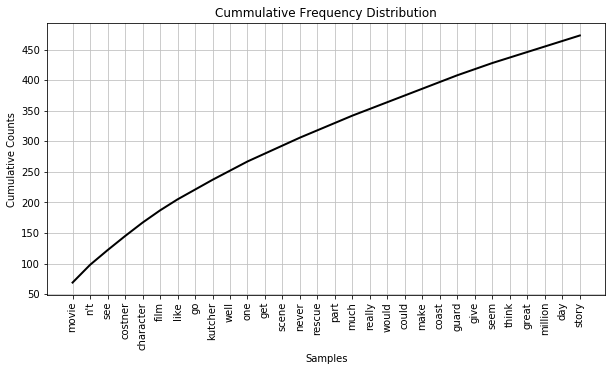

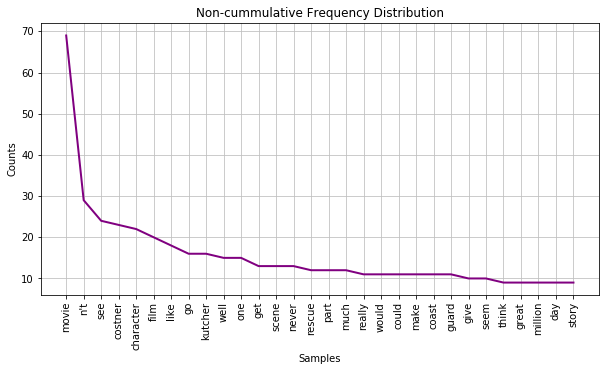

In [38]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 5))  
plt.title("Cummulative Frequency Distribution")

plot1 = FreqDist(lemm_words).plot(30, cumulative=True, color="black")

# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 5))  
plt.title("Non-cummulative Frequency Distribution")
plot2 = FreqDist(lemm_words).plot(30, cumulative=False, color="purple")


### Dispersion Plot

Show the location of words in the collection.

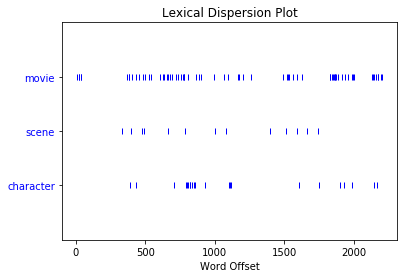

In [39]:
from nltk.draw.dispersion import dispersion_plot
dispersion_plot(lemm_words, ['movie', 'scene','character'])


### Sentiment Analysis

https://www.nltk.org/api/nltk.sentiment.html

In [43]:
# nltk.sentiment.sentiment_analyzer.SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

tokens2 = sent_tokenize(data)

def review_sentiment(text):
    points = SentimentIntensityAnalyzer().polarity_scores(text)
    print (points)
#     neg = points["neg"]
#     pos = points["pos"]
#     neu = points["neu"]
#     if neg > pos:
#         return ("Negative review")
#     elif neg < pos:
#         return ("Positive review")
#     else:
#         return ("Not feeling it...")

    
review_sent = [review_sentiment(token) for token in tokens2 ]
print (review_sent)


{'neg': 0.014, 'neu': 0.645, 'pos': 0.341, 'compound': 0.9832}
{'neg': 0.192, 'neu': 0.745, 'pos': 0.063, 'compound': -0.5095}
{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}
{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.2263}
{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.6249}
{'neg': 0.21, 'neu': 0.653, 'pos': 0.137, 'compound': -0.2498}
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.7861}
{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound': 0.2769}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.492, 'neu': 0.508, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.6739}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.194, 'neu': 0.667, 'pos': 0.139, 'compound': -0.2484}
{'neg': 0.281, 'neu': 0.47, 'pos': 0.249, 'compound': -0.431}
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.101, 'neu': 0.734, 'pos': 

{'neg': 0.228, 'neu': 0.637, 'pos': 0.135, 'compound': -0.4118}
{'neg': 0.32, 'neu': 0.68, 'pos': 0.0, 'compound': -0.3291}
{'neg': 0.179, 'neu': 0.691, 'pos': 0.13, 'compound': -0.2124}
{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.6369}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.037, 'neu': 0.921, 'pos': 0.042, 'compound': 0.0772}
{'neg': 0.191, 'neu': 0.809, 'pos': 0.0, 'compound': -0.3818}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.254, 'neu': 0.746, 'pos': 0.0, 'compound': -0.5267}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.289, 'neu': 0.711, 'pos': 0.0, 'compound': -0.6908}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.299, 'neu': 0.536, 'pos': 0.165, 'compound': -0.45

In [44]:
sent_counts=Counter(i for i in review_sent)
print (sent_counts)

Counter({'Positive review': 102, 'Negative review': 61, 'Not feeling it...': 48})


<BarContainer object of 3 artists>

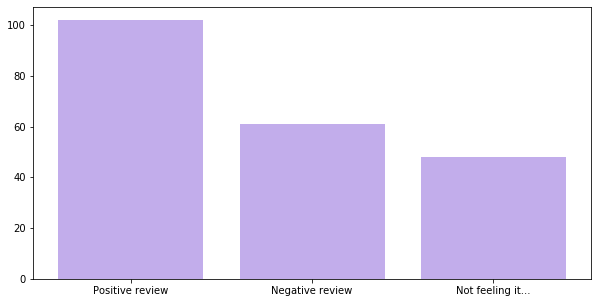

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  
plt.bar(sent_counts.keys(), sent_counts.values(), color=(0.7,0.6,0.9,0.8))

Reference: 

        https://www.nltk.org/book/ch01.html
        https://www.nltk.org/

